# **Import Library**

In [ ]:
import sqlite3 as db
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Import and Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# membuat koneksi SQL ke database SQLite
conn = db.connect('/content/gdrive/MyDrive/PACMANN/WRANGLING&SQL/olist.db')

In [ ]:
# mengakses atribut/kolom menjadi dataset yang siap diproses dan dianalisis sesuai objektif
query = """
SELECT
    A.ORDER_ID,
    A.ORDER_ITEM_ID,
    B.ORDER_PURCHASE_TIMESTAMP,
    D.SELLER_ID,
    D.SELLER_CITY,
    D.SELLER_STATE,
    C.PRODUCT_ID,
    E.PRODUCT_CATEGORY_NAME_ENGLISH AS product_category_name,
    A.PRICE
FROM
    OLIST_ORDER_ITEMS_DATASET A,
    OLIST_ORDER_DATASET B,
    OLIST_PRODUCTS_DATASET C,
    OLIST_SELLERS_DATASET D,
    PRODUCT_CATEGORY_NAME_TRANSLATION E
WHERE
A.ORDER_ID = B.ORDER_ID
AND A.PRODUCT_ID = C.PRODUCT_ID
AND A.SELLER_ID = D.SELLER_ID
AND C.PRODUCT_CATEGORY_NAME = E.PRODUCT_CATEGORY_NAME
AND B.ORDER_STATUS NOT IN ('CANCELED', 'UNAVAILABLE') 
"""
data = pd.read_sql_query(query,conn)
data.head()

,order_id,order_item_id,order_purchase_timestamp,seller_id,seller_city,seller_state,product_id,product_category_name,price
0,e481f51cbdc54678b7cc49136f2d6af7,1,2017-10-02 10:56:33,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,87285b34884572647811a353c7ac498a,housewares,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,1,2018-07-24 20:41:37,289cdb325fb7e7f891c38608bf9e0962,belo horizonte,SP,595fac2a385ac33a80bd5114aec74eb8,perfumery,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,1,2018-08-08 08:38:49,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,aa4383b373c6aca5d8797843e5594415,auto,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,1,2017-11-18 19:28:06,66922902710d126a0e7d26b0e3805106,belo horizonte,MG,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,1,2018-02-13 21:18:39,2c9e548be18521d1c43cde1c582c6de8,mogi das cruzes,SP,65266b2da20d04dbe00c5c2d3bb7859e,stationery,19.90


# **Data Preparation & Processing**

## Data Overview

In [ ]:
# informasi umum  data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111023 entries, 0 to 111022
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  111023 non-null  object 
 1   order_item_id             111023 non-null  int64  
 2   order_purchase_timestamp  111023 non-null  object 
 3   seller_id                 111023 non-null  object 
 4   seller_city               111023 non-null  object 
 5   seller_state              111023 non-null  object 
 6   product_id                111023 non-null  object 
 7   product_category_name     111023 non-null  object 
 8   price                     111023 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 7.6+ MB


## Modify Data Type

In [ ]:
# konversi tipe data 
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111023 entries, 0 to 111022
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  111023 non-null  object        
 1   order_item_id             111023 non-null  int64         
 2   order_purchase_timestamp  111023 non-null  datetime64[ns]
 3   seller_id                 111023 non-null  object        
 4   seller_city               111023 non-null  object        
 5   seller_state              111023 non-null  object        
 6   product_id                111023 non-null  object        
 7   product_category_name     111023 non-null  object        
 8   price                     111023 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 7.6+ MB


## Finding Missing Value or Null

In [ ]:
# memeriksa Niilai NaN pada Data
data.isnull().sum().sort_values(ascending=False)/len(data)*100

order_id                    0.0
order_item_id               0.0
order_purchase_timestamp    0.0
seller_id                   0.0
seller_city                 0.0
seller_state                0.0
product_id                  0.0
product_category_name       0.0
price                       0.0
dtype: float64

Tidak ditemukan missing value pada dataset ini

## Finding Duplicates

In [ ]:
data.duplicated().sum()

0

Tidak ditemukan data duplikat pada dataset ini

## Finding Outliers

In [ ]:
data.describe()

,order_item_id,price
count,111023.000000,111023.000000
mean,1.198229,120.755104
std,0.706931,183.372746
min,1.000000,0.850000
25%,1.000000,39.900000
50%,1.000000,74.990000
75%,1.000000,134.900000
max,21.000000,6735.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


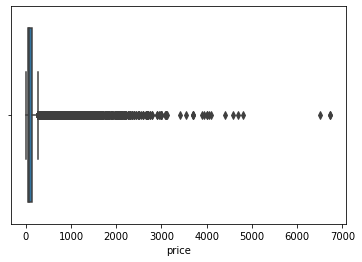

In [ ]:
sns.boxplot(data['price'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


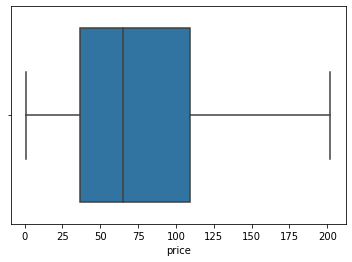

In [ ]:
# batas atas
batas_atas = data['price'].quantile(q=0.75)*1.5

# plot tanpa outlier
data_tanpa_outlier = data[data['price'] < batas_atas]

# plot kolom price tanpa extreme outlier
sns.boxplot(data_tanpa_outlier['price'])

## Handling Outlier 

In [ ]:
# batas atas
batas_atas = data['price'].quantile(q=0.75)*1.5

# mencari nilai median
median = data['price'].median()

# mengubah nilai outlier dengan median
data.loc[data['price'] > batas_atas, 'price']= median

data.describe()

,order_item_id,price
count,111023.000000,111023.000000
mean,1.198229,76.260805
std,0.706931,45.801623
min,1.000000,0.850000
25%,1.000000,39.900000
50%,1.000000,74.990000
75%,1.000000,99.900000
max,21.000000,202.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


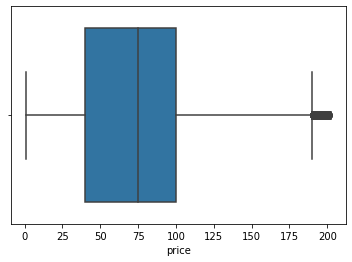

In [ ]:
sns.boxplot(data['price'])

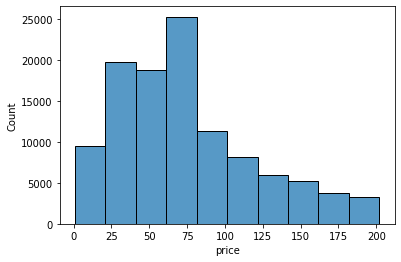

In [ ]:
sns.histplot(data['price'], bins=10)

## Handling Inconsistent Format

In [ ]:
data['product_category_name'].unique()

array(['housewares', 'perfumery', 'auto', 'pet_shop', 'stationery',
       'furniture_decor', 'office_furniture', 'garden_tools',
       'computers_accessories', 'bed_bath_table', 'toys',
       'construction_tools_construction', 'telephony', 'health_beauty',
       'electronics', 'baby', 'cool_stuff', 'watches_gifts',
       'air_conditioning', 'sports_leisure', 'books_general_interest',
       'small_appliances', 'food', 'luggage_accessories',
       'fashion_underwear_beach', 'christmas_supplies',
       'fashion_bags_accessories', 'musical_instruments',
       'construction_tools_lights', 'books_technical',
       'costruction_tools_garden', 'home_appliances', 'market_place',
       'agro_industry_and_commerce', 'party_supplies', 'home_confort',
       'cds_dvds_musicals', 'industry_commerce_and_business',
       'consoles_games', 'furniture_bedroom', 'construction_tools_safety',
       'fixed_telephony', 'drinks',
       'kitchen_dining_laundry_garden_furniture', 'fashion_shoes',


In [ ]:
# edit inkonsistensi
edit = {'home_confort': 'home_comfort', 'home_comfort_2': 'home_comfort', 'home_appliances_2':'home_appliances'}
data = data.replace(edit)

data['product_category_name'].unique()

array(['housewares', 'perfumery', 'auto', 'pet_shop', 'stationery',
       'furniture_decor', 'office_furniture', 'garden_tools',
       'computers_accessories', 'bed_bath_table', 'toys',
       'construction_tools_construction', 'telephony', 'health_beauty',
       'electronics', 'baby', 'cool_stuff', 'watches_gifts',
       'air_conditioning', 'sports_leisure', 'books_general_interest',
       'small_appliances', 'food', 'luggage_accessories',
       'fashion_underwear_beach', 'christmas_supplies',
       'fashion_bags_accessories', 'musical_instruments',
       'construction_tools_lights', 'books_technical',
       'costruction_tools_garden', 'home_appliances', 'market_place',
       'agro_industry_and_commerce', 'party_supplies', 'home_comfort',
       'cds_dvds_musicals', 'industry_commerce_and_business',
       'consoles_games', 'furniture_bedroom', 'construction_tools_safety',
       'fixed_telephony', 'drinks',
       'kitchen_dining_laundry_garden_furniture', 'fashion_shoes',


# **Data Analysis** 

## Top 10 Most and Least Ordered Product Categories

In [ ]:
# 10 kategori produk yang paling banyak dipesan
most_ordered = data.rename({'product_category_name':'product_category','order_id':'order_counts'},axis=1)
most_ordered = most_ordered[['product_category','order_counts']].groupby('product_category').count()
most_ordered = most_ordered.sort_values('order_counts', ascending=False).reset_index().head(10)

most_ordered

,product_category,order_counts
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827
5,housewares,6964
6,watches_gifts,5991
7,telephony,4545
8,garden_tools,4347
9,auto,4235


### Visualisasi

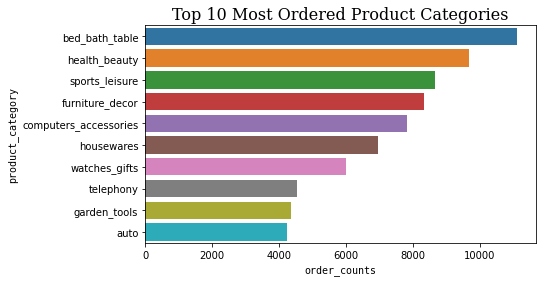

In [ ]:
# membuat barplot Top 10 Most Ordered Product Categories)
fig, ax = plt.subplots(figsize = (7,4))
sns.barplot(data=most_ordered, x='order_counts', y='product_category',ax=ax)

# membuat styling barplot 
ax.set_title('Top 10 Most Ordered Product Categories', fontsize=16, fontfamily='serif')
ax.set_ylabel('product_category', fontsize=10, fontfamily='monospace')
ax.set_xlabel('order_counts',fontsize=10, fontfamily='monospace')

plt.show()

In [ ]:
# 10 kategori produk yang paling sedikit dipesan
least_ordered = data.rename({'product_category_name':'product_category','order_id':'order_counts'},axis=1)
least_ordered = least_ordered[['product_category','order_counts']].groupby('product_category').count()
least_ordered = least_ordered.sort_values('order_counts', ascending=True).reset_index().head(10)

least_ordered

,product_category,order_counts
0,security_and_services,2
1,fashion_childrens_clothes,8
2,la_cuisine,14
3,cds_dvds_musicals,14
4,arts_and_craftmanship,24
5,fashion_sport,30
6,flowers,33
7,music,38
8,furniture_mattress_and_upholstery,38
9,diapers_and_hygiene,39


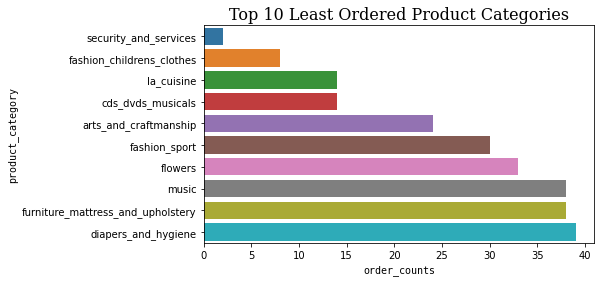

In [ ]:
# membuat barplot Top 10 Least Ordered Product Categories)
fig, ax = plt.subplots(figsize = (7,4))
sns.barplot(data=least_ordered, x='order_counts', y='product_category',ax=ax)

# membuat styling barplot 
ax.set_title('Top 10 Least Ordered Product Categories', fontsize=16, fontfamily='serif')
ax.set_ylabel('product_category', fontsize=10, fontfamily='monospace')
ax.set_xlabel('order_counts',fontsize=10, fontfamily='monospace')

plt.show()

## Sellers with the Highest Sales by State

In [ ]:
# menambah kolom sales
data['sales'] = data['price'] * data['order_item_id']
data['sales'] = data['sales'].astype(int)

# lokasi penjual dengan penjualan tertinggi 
seller = data[['seller_state','sales']].groupby('seller_state').sum()
seller = seller.sort_values('sales', ascending=False).reset_index().head(5)
seller

,seller_state,sales
0,SP,6731482
1,PR,836843
2,MG,800290
3,RJ,452351
4,SC,384657


### Visualisasi

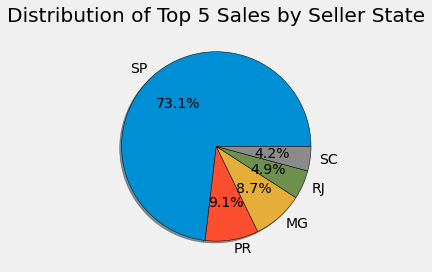

In [ ]:
# membuat distribusi top 5 sales by seller state dengan pie chart
plt.style.use('fivethirtyeight')

slices = seller['sales']
labels = seller['seller_state']

plt.pie(slices, labels=labels, shadow=True, autopct='%1.1f%%', wedgeprops={'edgecolor':'black'})
plt.title('Distribution of Top 5 Sales by Seller State')
plt.tight_layout()

plt.show()

## Sales Trend

In [ ]:
# tambah kolom tahun
data['year'] = data['order_purchase_timestamp'].dt.year

# tambah kolom bulan
data['month'] = data['order_purchase_timestamp'].dt.month

In [ ]:
# pertumbuhan sales 
sales_trends = data[['sales','month']].groupby('month').sum().reset_index()
sales_trends

,month,sales
0,1,797838
1,2,839807
2,3,959876
3,4,937369
4,5,1068291
5,6,916208
6,7,1008314
7,8,1048117
8,9,431424
9,10,511861


### Visualisasi

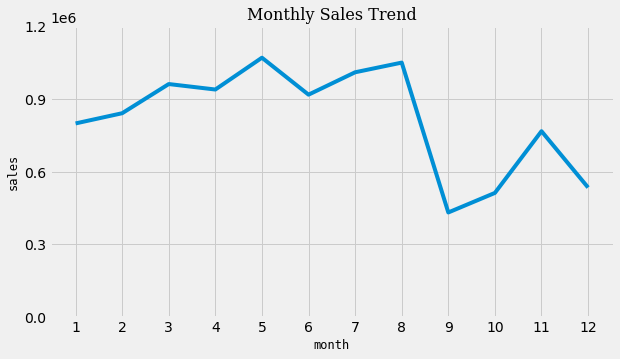

In [ ]:
# membuat lineplot 
fig, ax = plt.subplots(figsize = (9,5))

sns.lineplot(data=sales_trends, x='month', y='sales', ax=ax)

# Mendefinisikan batas axis y yang baru
batas_y = [400000,1100000]

# melakukan styling lineplot
ax.set_title('Monthly Sales Trend', fontsize=16, fontfamily='serif')
ax.set_ylabel('sales', fontsize=12, fontfamily='monospace')
ax.set_xlabel('month',fontsize=12, fontfamily='monospace')
ax.set_ylim(batas_y)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.yticks([0, 300000, 600000, 900000, 1200000])

plt.show()